<a href="https://colab.research.google.com/github/jmbanda/CSC4850-Machine-Learning/blob/main/ML_example4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Examples Part 4

In this notebook we will cover different sampling techniques, how to use GridSearchCV to build a pipeline and finally, plotting ROC and PR curves.

# Introduction to Population and Sample

To start with, let’s have a look at some basic terminology. It is important to learn the concepts of population and sample. The **population** is the set of all observations (individuals, objects, events, or procedures) and is usually very large and diverse, whereas a **sample** is a subset of observations from the population that ideally is a true representation of the population.

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*VnNrkwNuW2hBKA8DC84Gdg.png">

Given that experimenting with an entire population is either impossible or simply too expensive, researchers or analysts use samples rather than the entire population in their experiments or trials. To make sure that the experimental results are reliable and hold for the entire population, the sample needs to be a true representation of the population. That is, the sample needs to be unbiased.

## Random Sampling

The simplest data sampling technique that creates a random sample from the original population is Random Sampling. In this approach, every sampled observation has the same probability of getting selected during the sample generation process. Random Sampling is usually used when we don’t have any kind of prior information about the target population.

For example random selection of 3 individuals from a population of 10 individuals. Here, each individual has an equal chance of getting selected to the sample with a probability of selection of 1/10.

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ZWa1miELJeaGPzRUC9NwqA.png">

### Random Sampling: Python Implementation


First, we generate random data that will serve as population data. We will, therefore, randomly sample 10K data points from Normal distribution with mean mu = 10 and standard deviation std = 2. After this, we create a Python function called random_sampling() that takes population data and desired sample size and produces as output a random sample.

In [2]:
import numpy as np

# generating population data following Normal Distribution
N = 10000
mu = 10
std = 2
population_df = np.random.normal(mu,std,N)

# function that creates random sample 
def random_sampling(df, n):
    random_sample = np.random.choice(df,replace = False, size = n)
    return(random_sample)
randomSample = random_sampling(population_df, N)
randomSample

array([14.78968076,  8.15751783,  8.36155222, ...,  8.34425408,
       10.63244894, 11.94724772])

## Systematic Sampling

Systematic sampling is defined as a probability sampling approach where the elements from a target population are selected from a random starting point and after a fixed sampling interval.

Stated differently, systematic sampling is an extended version of probability sampling techniques in which each member of the group is selected at regular periods to form a sample. We calculate the sampling interval by dividing the entire population size by the desired sample size.

Note that, Systematic Sampling usually produces a random sample but is not addressing the bias in the created sample.

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*FLyZ66yPDa44EYwTvP7mVQ.png">

### Systematic Sampling: Python Implementation

We generate data that serve as population data as in the previous case. We then create a Python function called systematic_sample() that takes population data and interval for the sampling and produces as output a systematic sample.

In [3]:
import numpy as np
import pandas as pd
# generating population data following Normal Distribution
N = 10000
mu = 10
std = 2
population_df = np.random.normal(mu,std,N)

# function that creates random sample using Systematic Sampling
def systematic_sampling(df, step):
    id = pd.Series(np.arange(1,len(df),1))
    df = pd.Series(df)
    df_pd = pd.concat([id, df], axis = 1)
    df_pd.columns = ["id", "data"]
    # these indices will increase with the step amount not 1
    selected_index = np.arange(1,len(df),step)
    # using iloc for getting thee data with selected indices
    systematic_sampling = df_pd.iloc[selected_index]
    return(systematic_sampling)

n = 10
step = int(N/n)
sample = systematic_sampling(population_df, step)
sample

,id,data
1,2.0,8.261409
1001,1002.0,10.941693
2001,2002.0,9.506230
3001,3002.0,7.318524
4001,4002.0,8.510567
5001,5002.0,10.140102
6001,6002.0,10.121986
7001,7002.0,7.405897
8001,8002.0,10.172783
9001,9002.0,7.903344


## Cluster Sampling

Cluster sampling is a probability sampling technique where we divide the population into multiple clusters(groups) based on certain clustering criteria. Then we select a random cluster(s) with simple random or systematic sampling techniques. So, in cluster sampling, the entire population is divided into clusters or segments and then cluster(s) are randomly selected.

For example, if you want to conduct an experience evaluating the performance of sophomores in business education across Europe. It is impossible to conduct an experiment that involves a student in every university across the EU. Instead, by using Cluster Sampling, we can group the universities from each country into one cluster. These clusters then define all the sophomore student population in the EU. Next, you can use simple random sampling or systematic sampling and randomly select cluster(s) for the purposes of your research study.

Note that, Systematic Sampling usually produces a random sample but is not addressing the bias in the created sample.

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*4GTPOFJmK3U8lY9H2nw5nw.png">



### Cluster Sampling: Python Implementation

First, we generate data that will serve as population data with 10K observations, and this data consists of the following 4 variables:

Price: generated using Uniform distribution,
Id
event_type: which is a categorical variable with 3 possible values {type1, type2, type3}
click: binary variable taking values {0: no click, 1: click}

In [4]:
import numpy as np
import pandas as pd

# Generating Population data 
price_vb = pd.Series(np.random.uniform(1,4,size = N))
id = pd.Series(np.arange(0,len(price_vb),1))
event_type = pd.Series(np.random.choice(["type1","type2","type3"],size = len(price_vb)))
click = pd.Series(np.random.choice([0,1],size = len(price_vb)))
df = pd.concat([id,price_vb,event_type, click],axis = 1)
df.columns = ["id","price","event_type", "click"]
df

,id,price,event_type,click
0,0,3.348591,type3,0
1,1,1.250109,type2,1
2,2,2.686037,type3,0
3,3,2.691641,type1,1
4,4,2.589645,type2,1
...,...,...,...,...
9995,9995,1.243976,type2,0
9996,9996,2.246366,type3,0
9997,9997,2.749073,type3,1
9998,9998,2.714811,type2,0


Then the function `get_clustered_Sample()` takes as inputs the original data, the amount of observations per cluster, and a number of clusters you want to select, and produces as output a clustered sample.

In [5]:
def get_clustered_Sample(df, n_per_cluster, num_select_clusters):
    N = len(df)
    K = int(N/n_per_cluster)
    data = None
    for k in range(K):
        sample_k = df.sample(n_per_cluster)
        sample_k["cluster"] = np.repeat(k,len(sample_k))
        df = df.drop(index = sample_k.index)
        data = pd.concat([data,sample_k],axis = 0)

    random_chosen_clusters = np.random.randint(0,K,size = num_select_clusters)
    samples = data[data.cluster.isin(random_chosen_clusters)]
    return(samples)

sample = get_clustered_Sample(df = df, n_per_cluster = 100, num_select_clusters = 2)
sample

,id,price,event_type,click,cluster
9226,9226,3.727015,type3,1,34
7140,7140,1.419832,type2,1,34
8641,8641,1.543819,type1,0,34
4193,4193,1.102810,type3,1,34
4782,4782,1.495790,type2,0,34
...,...,...,...,...,...
2485,2485,2.769444,type3,1,96
4052,4052,2.270999,type2,1,96
4343,4343,1.173676,type2,1,96
8690,8690,3.849399,type3,1,96


## Weighted Sampling

In some experiments, you might need items sampling probabilities to be according to weights associated with each item, that’s when the proportions of the type of observations should be taken into account. For example, you might need a sample of queries in a search engine with weight as a number of times these queries have been performed so that the sample can be analyzed for overall impact on the user experience. In this case, Weighted Sampling is much more preferred compared to Random Sampling or Systematic Sampling.

Weighted Sampling is a data sampling method with weights, that intends to compensate for the selection of specific observations with unequal probabilities (oversampling), non-coverage, non-responses, and other types of bias. If a biased data set is not adjusted and a simple random sampling type of approach is used instead, then the population descriptors (e.g., mean, median) will be skewed and they will fail to correctly represent the population’s proportion to the population.

Weighted Sampling addresses the bias in the sample, by creating a sample that takes into account the proportions of the type of observations in the population. Hence, Weighted Sampling usually produces a random and unbiased sample.

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*zNBVo75a4FGOLo-_ELyiyA.png">

### Weighted Sampling: Python Implementation

The function get_weighted_sample() takes as inputs the original data, and the desired sample size, and produces as output a weighted sample. Note that, the proportions, in this case, are defined based on the click event. That is, we compute the proportion of data points that had click events of 1 (let’s say X%) and 0 (Y%, where Y% = 100-X%), then we generate a random sample such that, the sample will also contain X% observations with click = 1 and Y% observations with click = 0.

In [6]:
def get_weighted_sample(df,n):
    def get_class_prob(x):
        weight_x = int(np.rint(n * len(x[x.click != 0]) / len(df[df.click != 0])))
        sampled_x = x.sample(weight_x).reset_index(drop=True)
        return (sampled_x)
        # we are grouping by the target class we use for the proportions

    weighted_sample = df.groupby('event_type').apply(get_class_prob)
    print(weighted_sample["event_type"].value_counts())
    return (weighted_sample)

sample = get_weighted_sample(df,100)
sample

type3    35
type1    33
type2    33
Name: event_type, dtype: int64


id     price event_type  click
event_type                                     
type1      0   9691  2.616468      type1      1
           1   7359  1.126266      type1      0
           2   5969  1.938191      type1      0
           3   8152  3.651034      type1      1
           4    957  2.540044      type1      0
...             ...       ...        ...    ...
type3      30  8891  3.092970      type3      0
           31   470  2.109674      type3      1
           32  2120  3.417902      type3      1
           33  6715  2.536572      type3      0
           34  8656  3.670663      type3      0

[101 rows x 4 columns]

# Stratified Sampling

Stratified Sampling is a data sampling approach, where we divide a population into homogeneous subpopulations called strata based on specific characteristics (e.g., age, race, gender identity, location, event type etc.).

Every member of the population studied should be in exactly one stratum. Each stratum is then sampled using Cluster Sampling, allowing data scientists to estimate statistical measures for each sub-population. We rely on Stratified Sampling when the populations’ characteristics are diverse and we want to ensure that every characteristic is properly represented in the sample.

So, Stratified Sampling, is simply, the combination of Clustered Sampling and Weighted Sampling.

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*iVf_CmE2kERqN9it8UI6Tg.png">

## Stratified Sampling: Python Implementation

The function get_stratified_sample() takes as inputs the original data, the desired sample size, the number of clusters needed, and it produces as output a stratified sample. Note that, this function, firstly performs weighted sampling using the click event. Secondly, it performs clustered sampling using the event_type.

In [7]:
def get_startified_sample(df,n,num_clusters_needed):
    N = len(df)
    num_obs_per_cluster = int(N/n)
    K = int(N/num_obs_per_cluster)

    def get_weighted_sample(df,num_obs_per_cluster):
        def get_sample_per_class(x):
            n_x = int(np.rint(num_obs_per_cluster*len(x[x.click !=0])/len(df[df.click !=0])))
            sample_x = x.sample(n_x)
            return(sample_x)
        weighted_sample = df.groupby("event_type").apply(get_sample_per_class)
        return(weighted_sample)

    stratas = None
    for k in range(K):
        weighted_sample_k = get_weighted_sample(df,num_obs_per_cluster).reset_index(drop = True)
        weighted_sample_k["cluster"] = np.repeat(k,len(weighted_sample_k))
        stratas = pd.concat([stratas, weighted_sample_k],axis = 0)
        df.drop(index = weighted_sample_k.index)
    selected_strata_clusters = np.random.randint(0,K,size = num_clusters_needed)
    stratified_samples = stratas[stratas.cluster.isin(selected_strata_clusters)]
    return(stratified_samples)

sample = get_startified_sample(df = df,n = 100,num_clusters_needed = 2)
sample

,id,price,event_type,click,cluster
0,9888,3.124357,type1,1,13
1,8516,1.475911,type1,1,13
2,3124,3.225580,type1,0,13
3,9749,1.070361,type1,1,13
4,8255,3.583826,type1,0,13
...,...,...,...,...,...
96,846,3.692454,type3,1,67
97,3970,3.764113,type3,0,67
98,841,1.075733,type3,1,67
99,3545,3.049979,type3,1,67


# Using GridSearchCV



In [8]:
import random
import os
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split


In [9]:
if not os.path.isfile('data/creditcard.csv'):
    !wget --no-check-certificate --content-disposition http://nube.jccm.es/index.php/s/Zs7SYtZQJ3RQ2H2/download
    !tar xzf creditcard.tgz

--2023-03-06 14:53:35--  http://nube.jccm.es/index.php/s/Zs7SYtZQJ3RQ2H2/download
Resolving nube.jccm.es (nube.jccm.es)... 89.107.242.157
Connecting to nube.jccm.es (nube.jccm.es)|89.107.242.157|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://nube.jccm.es/index.php/s/Zs7SYtZQJ3RQ2H2/download [following]
--2023-03-06 14:53:36--  https://nube.jccm.es/index.php/s/Zs7SYtZQJ3RQ2H2/download
Connecting to nube.jccm.es (nube.jccm.es)|89.107.242.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68786819 (66M) [application/x-compressed]
Saving to: ‘creditcard.tgz’

creditcard.tgz      100%[===================>]  65.60M   793KB/s    in 86s     

2023-03-06 14:55:02 (786 KB/s) - ‘creditcard.tgz’ saved [68786819/68786819]



In [14]:
random_state=1

def load_creditcard(n_examples=0):
    df = pd.read_csv('data/creditcard.csv')
    print("Fraud: {0:.3f}% {1}".format(df.Class[df.Class == 1].count()*100/df.shape[0], df.Class[df.Class == 1].count()))
    print("Valid: {0:.3f}% {1}".format(df.Class[df.Class == 0].count()*100/df.shape[0], df.Class[df.Class == 0].count()))
    y = df.Class
    X = df.drop(['Class', 'Time', 'Amount'], axis=1).values
    if n_examples > 0:
        # Take first n_examples samples
        X = X[:n_examples, :]
        y = y[:n_examples, :]
    else:
        # Take all the positive samples with a number of random negatives
        if n_examples < 0:
            Xt = X[(y == 1).ravel()]
            yt = y[(y == 1).ravel()]
            indices = random.sample(range(X.shape[0]), -1 * n_examples)
            X = np.append(Xt, X[indices], axis=0)
            y = np.append(yt, y[indices], axis=0)
    print("X.shape", X.shape, " y.shape", y.shape)
    print("Fraud: {0:.3f}% {1}".format(len(y[y == 1])*100/X.shape[0], len(y[y == 1])))
    print("Valid: {0:.3f}% {1}".format(len(y[y == 0]) * 100 / X.shape[0], len(y[y == 0])))
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=random_state, stratify=y)
    return Xtrain, Xtest, ytrain, ytest

data = load_creditcard(-1000) 
#data = load_creditcard(0) # Take all the samples

Xtrain = data[0]
Xtest = data[1]
ytrain = data[2]
ytest = data[3]

Fraud: 0.173% 492
Valid: 99.827% 284315
X.shape (1492, 28)  y.shape (1492,)
Fraud: 32.976% 492
Valid: 67.024% 1000


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier(criterion='entropy')

# Create the parametergrid
param_grid = {
    'max_depth':[2, 4, 8, 15],
    'max_features':['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_rf_class = GridSearchCV(
    estimator=rf_class,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    refit=True,
    return_train_score=True
)

print(grid_rf_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': ['auto', 'sqrt']},
             return_train_score=True, scoring='roc_auc')


## Understanding a grid search output


### Exploring the grid search results
You will now explore the `cv_results_` property of the GridSearchCV object. This is a dictionary that we can read into a pandas DataFrame and contains a lot of useful information about the grid search we just undertook.

A reminder of the different column types in this property:

- `time_` columns
- `param_` columns (one for each hyperparameter) and the singular params column (with all hyperparameter settings)
- a `train_score` column for each cv fold including the mean_train_score and std_train_score columns
- a `test_score` column for each cv fold including the mean_test_score and std_test_score columns
- a `rank_test_score` column with a number from 1 to n (number of iterations) ranking the rows based on their `mean_test_score`

In [16]:
grid_rf_class.fit(Xtrain, ytrain)

# Read the cv_results property into adataframe & print it out
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
print(cv_results_df)

# Extract and print the column with a dictionary of hyperparameters used
column = cv_results_df.loc[:, ["params"]]
print(column)

# Extract and print the row that had the best mean test score
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1]
print(best_row)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.550368      0.068459         0.032146        0.004491   
1       0.562965      0.029085         0.034830        0.002976   
2       0.764004      0.062777         0.027176        0.011484   
3       0.720883      0.054319         0.031080        0.004391   
4       0.922846      0.036812         0.028044        0.000950   
5       0.877358      0.071911         0.030115        0.003781   
6       0.943463      0.017882         0.030261        0.002776   
7       0.763517      0.115416         0.020940        0.006677   

  param_max_depth param_max_features  \
0               2               auto   
1               2               sqrt   
2               4               auto   
3               4               sqrt   
4               8               auto   
5               8               sqrt   
6              15               auto   
7              15               sqrt   

                                   

### Analyzing the best results
At the end of the day, we primarily care about the best performing 'square' in a grid search. Luckily Scikit Learn's `gridSearchCV` objects have a number of parameters that provide key information on just the best square (or row in `cv_results_`).

Three properties you will explore are:

- `best_score_` – The score (here ROC_AUC) from the best-performing square.
- `best_index_` – The index of the row in `cv_results_` containing information on the best-performing square.
- `best_params_` – A dictionary of the parameters that gave the best score, for example 'max_depth': 10

In [17]:
# Print out the ROC_AUC score from the best-performing square
best_score = grid_rf_class.best_score_
print(best_score)

# Create a variable from the row related to the best-performing square
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
best_row = cv_results_df.loc[[grid_rf_class.best_index_]]
print(best_row)

# Get the max_depth parameter from the best-performing square and print
best_max_depth = grid_rf_class.best_params_['max_depth']
print(best_max_depth)

0.9769017172086226
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5       0.877358      0.071911         0.030115        0.003781   

  param_max_depth param_max_features  \
5               8               sqrt   

                                     params  split0_test_score  \
5  {'max_depth': 8, 'max_features': 'sqrt'}           0.993892   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
5           0.969048           0.983747  ...         0.976902        0.015949   

   rank_test_score  split0_train_score  split1_train_score  \
5                1            0.999851            0.999974   

   split2_train_score  split3_train_score  split4_train_score  \
5            0.999916            0.999994            0.999935   

   mean_train_score  std_train_score  
5          0.999934          0.00005  

[1 rows x 22 columns]
8


### Using the best results
While it is interesting to analyze the results of our grid search, our final goal is practical in nature; we want to make predictions on our test set using our estimator object.

We can access this object through the `best_estimator_` property of our grid search object.

In this exercise we will take a look inside the `best_estimator_` property and then use this to make predictions on our test set for credit card defaults and generate a variety of scores. Remember to use `predict_proba` rather than `predict` since we need probability values rather than class labels for our roc_auc score. We use a slice `[:,1]` to get probabilities of the positive class.

In [18]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# See what type of object the best_estimator_property is
print(type(grid_rf_class.best_estimator_))

# Create an array of predictions directly using the best_estimator_property
predictions = grid_rf_class.best_estimator_.predict(Xtest)

# Take a look to confirm it worked, this should be an array of 1's and 0's
print(predictions[0:5])

# Now create a confusion matrix
print("Confusion Matrix \n", confusion_matrix(ytest, predictions))

# Get the ROC-AUC score
predictions_proba = grid_rf_class.best_estimator_.predict_proba(Xtest)[:, 1]
print("ROC-AUC Score \n", roc_auc_score(ytest, predictions_proba))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[0 0 0 0 0]
Confusion Matrix 
 [[296   4]
 [ 19 129]]
ROC-AUC Score 
 0.9792567567567567


The `.best_estimator_` property is a really powerful property to understand for streamlining your machine learning model building process. You now can run a grid search and seamlessly use the best model from that search to make predictions.

In [20]:
print("Best estimator: ", grid_rf_class.best_estimator_)
print("Best hyperparameters: ", grid_rf_class.best_params_)
print("Best accuracy: ", grid_rf_class.best_score_)

Best estimator:  RandomForestClassifier(criterion='entropy', max_depth=8)
Best hyperparameters:  {'max_depth': 8, 'max_features': 'sqrt'}
Best accuracy:  0.9769017172086226


# Plotting ROC curves

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Plot of a ROC curve for a specific class



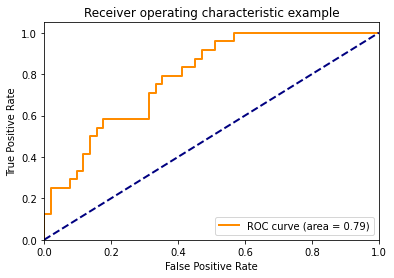

In [22]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Plot ROC curves for the multiclass problem



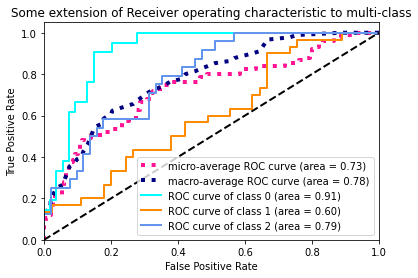

In [24]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Plotting Precision Recall Curves

In [25]:
# Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import norm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

## Generate normally distributed numpy arrays for two equally balanced classes

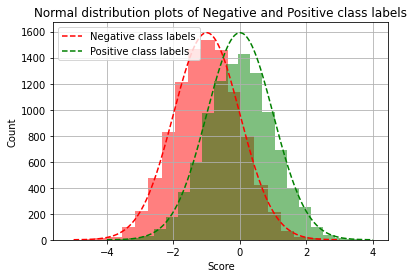

In [28]:
def normal_distribution(mu, sigma, N, bins, label, plt_color, is_plot=True):
  # Simulate score data from a normal distribution based on: mu, sigma and N
  scores = np.sort(norm.rvs(loc=mu, scale=sigma, size=N))
  
  # Get bell curve for reference
  x = np.linspace(-4, 4, N)
  bell = norm.pdf(x) * N * max(norm.pdf(x))
  
  if is_plot:
    plt.hist(scores, density=0, color=plt_color, alpha=.5, bins=bins)
    plt.plot(x+mu, bell, '--', label=label, color=plt_color)
  
  return scores, x, bell

BINS = 20

plt.figure()

# Distribution for Negative class labels
N1 = 10000
mu1 = -1  # distribution is offset by -1 from the centre
sigma1 = 1
label1 = 'Negative class labels'
scores1, x1, bell1 = normal_distribution(mu1, sigma1, N1, BINS, label1, plt_color='red')

# Distribution for Positive class labels
N2 = 10000
mu2 = 0
sigma2 = 1
label2 = 'Positive class labels'
scores2, x2, bell2 = normal_distribution(mu2, sigma2, N2, BINS, label2, plt_color='green')

# Plot
plt.title("Normal distribution plots of Negative and Positive class labels")
plt.xlabel('Score')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

# Build two lists for (i) all the true labels (ii) all the score values

In [29]:
# Append the true class labels to the list of negative class labels
y_true = N1*[0] + N2*[1] 
y_score = list(scores1) + list(scores2)
y_score = [np.round(y,2) for y in y_score]

print("N1, N2:", N1, N2)
print("len(y_true):", len(y_true))
assert(len(y_true) == len(y_score))
print("---")

print("Mid 10 values (right most negative red scores, left most positive green scores:")
print("y_true[N1-5:N1+5]:", y_true[N1-5:N1+5])
print("y_score[N1-5:N1+5]:", y_score[N1-5:N1+5])


N1, N2: 10000 10000
len(y_true): 20000
---
Mid 10 values (right most negative red scores, left most positive green scores:
y_true[N1-5:N1+5]: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_score[N1-5:N1+5]: [2.26, 2.37, 2.39, 2.55, 2.83, -3.69, -3.49, -3.4, -3.37, -3.29]


  ## Print confusion matrix & classification report for different classification thresholds

In [30]:
for threshold in [-1, -0.5, 0]:  # test 3 score thresholds which are used to determine if a class is predicted to be 0 or 1
  print("threshold:", threshold)
  print("----------")
  y_pred = [0 if y < threshold else 1 for y in y_score]

  # from sklearn.metrics import confusion_matrix
  # cm = confusion_matrix(y_true, y_pred)

  # Pandas 'crosstab' displays a better formated confusion matrix than the one in sklearn
  cm = pd.crosstab(pd.Series(y_true), pd.Series(y_pred), rownames=['Reality'], colnames=['Predicted'], margins=True)
  print(cm) 

  print()
  print("Classification report:")
  print(classification_report(y_true, y_pred))
  print()

threshold: -1
----------
Predicted     0      1    All
Reality                      
0          4930   5070  10000
1          1601   8399  10000
All        6531  13469  20000

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.49      0.60     10000
           1       0.62      0.84      0.72     10000

    accuracy                           0.67     20000
   macro avg       0.69      0.67      0.66     20000
weighted avg       0.69      0.67      0.66     20000


threshold: -0.5
----------
Predicted     0      1    All
Reality                      
0          6809   3191  10000
1          3150   6850  10000
All        9959  10041  20000

Classification report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68     10000
           1       0.68      0.69      0.68     10000

    accuracy                           0.68     20000
   macro avg       0.68      0.68      0.68     20000


## Precision-Recall curves

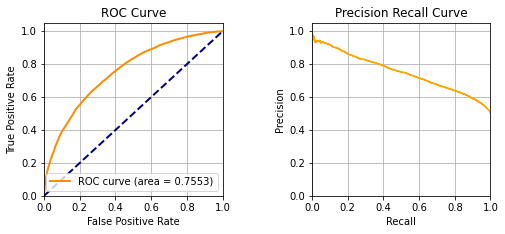

In [31]:
# Get ROC curve FPR and TPR from true labels vs score values
fpr, tpr, _ = roc_curve(y_true, y_score)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)

# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(y_true, y_score)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1,2,2)
plt.step(recall, precision, color='orange', where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.show()

# Sources

https://towardsdatascience.com/data-sampling-methods-in-python-a4400628ea1b

https://colab.research.google.com/github/rpi-techfundamentals/spring2019-materials/blob/master/05-intro-modeling/04-svm-roc.ipynb

